In [92]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.simplefilter("ignore")

In [93]:
test_df = pd.read_csv('test_titanic.csv')
train_df = pd.read_csv('train_titanic.csv')

In [94]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [95]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [96]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [97]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1,1)).sort_values(ascending=False)
missing_data = pd.concat([total,percent_2],axis=1,keys=['Total','%'])
missing_data.head()

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


In [98]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

<Axes: ylabel='count'>

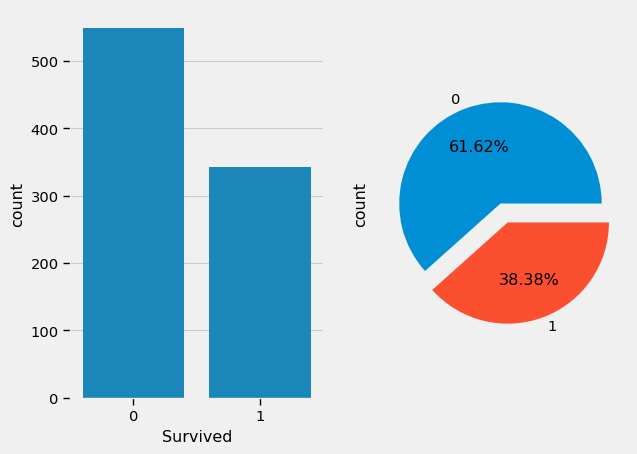

<Figure size 300x400 with 0 Axes>

In [99]:
# Target distribution analysis
fig, ax = plt.subplots(1,2)

plt.style.use('fivethirtyeight')
plt.figure(figsize=(3,4))
sns.set_context("paper",font_scale=1.2)
sns.countplot(train_df,x='Survived',ax=ax[0])
train_df['Survived'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.2f%%',ax=ax[1])

In [100]:
# Survival with Sex
pd.crosstab(train_df['Sex'],train_df['Survived']).apply(lambda r: round((r/r.sum())*100,1),axis=1)

Survived,0,1
Sex,,
female,25.8,74.2
male,81.1,18.9


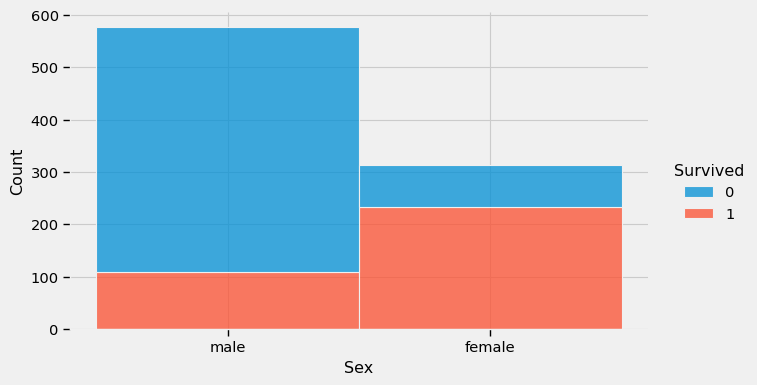

In [101]:
sns.displot(data=train_df,kind='hist',x='Sex',hue='Survived',multiple='stack',bins=25,height=4,aspect=1.7)

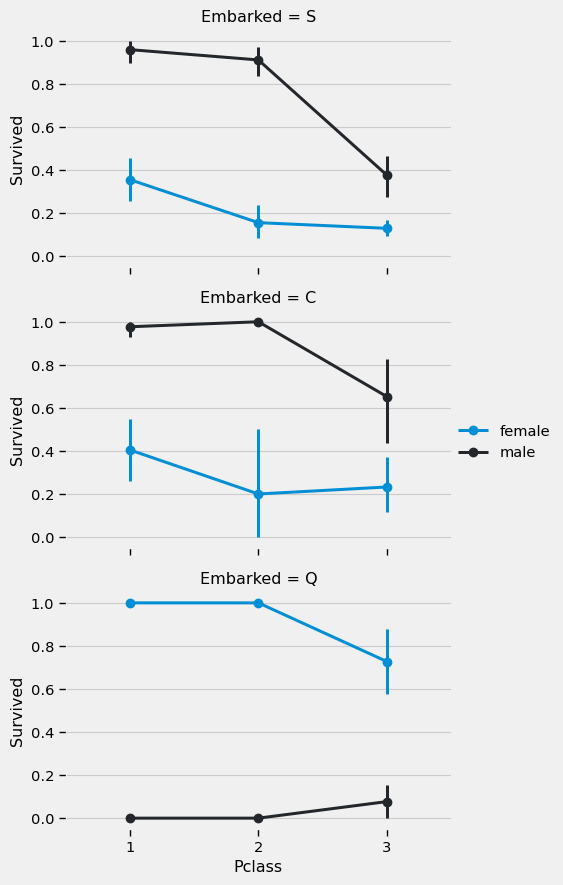

In [102]:
FacetGrid = sns.FacetGrid(train_df,row='Embarked',aspect=1.6)
FacetGrid.map(sns.pointplot,'Pclass','Survived','Sex',palette=None,order=None,hue_order=None)
FacetGrid.add_legend()

<Axes: xlabel='Pclass', ylabel='Survived'>

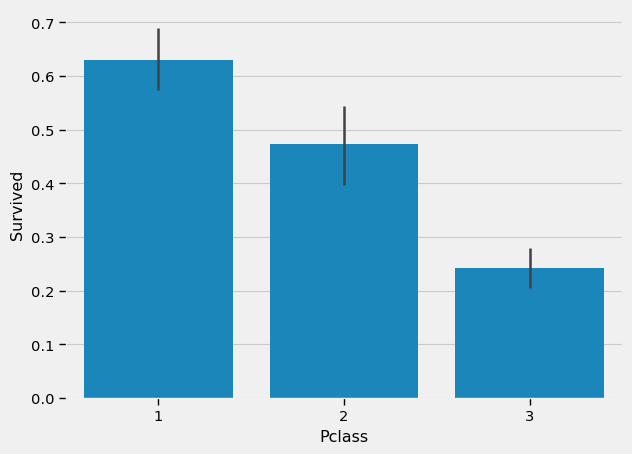

In [103]:
sns.barplot(x='Pclass',y='Survived',data=train_df)

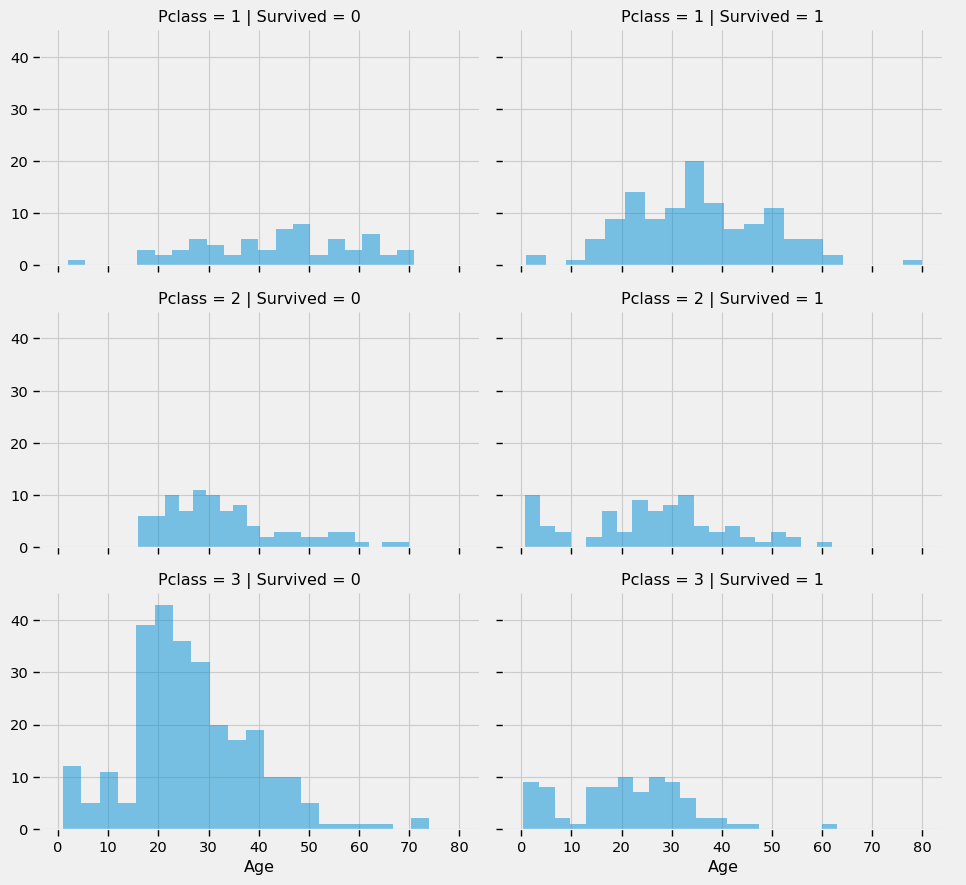

In [104]:
grid = sns.FacetGrid(train_df,col='Survived',row='Pclass',aspect=1.6)
grid.map(plt.hist,'Age',alpha=0.5,bins=20)
grid.add_legend()

0.38910778230082704
0.17827415364210353


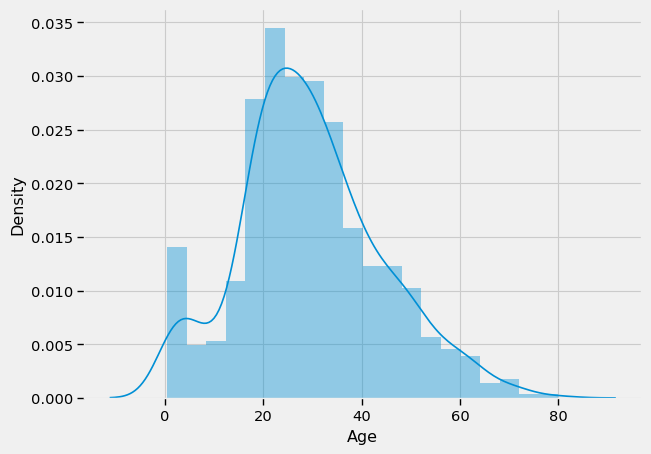

In [105]:
# Age column
sns.distplot(train_df['Age'])
print(train_df['Age'].skew())  # skewness
print(train_df['Age'].kurt())  # peakedness

<Axes: ylabel='Age'>

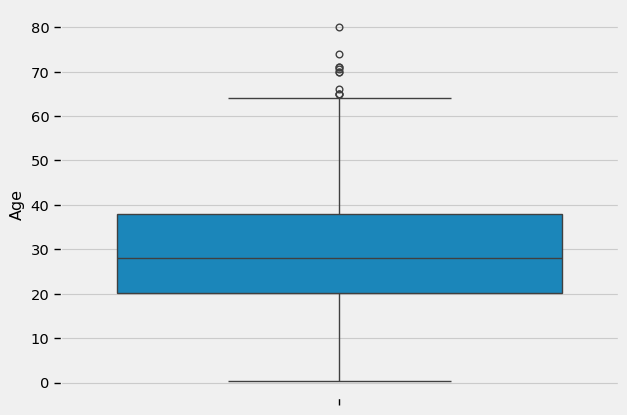

In [106]:
sns.boxplot(train_df['Age'])

In [107]:
print('People with age range between 65 and 70 are : ',train_df[(train_df['Age']>65) & (train_df['Age']<70)].shape[0])
print('People with age range between 70 and 75 are : ',train_df[(train_df['Age']>70) & (train_df['Age']<75)].shape[0])
print('People with age greater than 75 are : ',train_df[(train_df['Age']>75)].shape[0])

print('-'*50)

print('People with age between 0 and 1 are : ',train_df[(train_df['Age']<1)].shape[0])

People with age range between 65 and 70 are :  1
People with age range between 70 and 75 are :  4
People with age greater than 75 are :  1
--------------------------------------------------
People with age between 0 and 1 are :  7


4.787316519674893
33.39814088089868


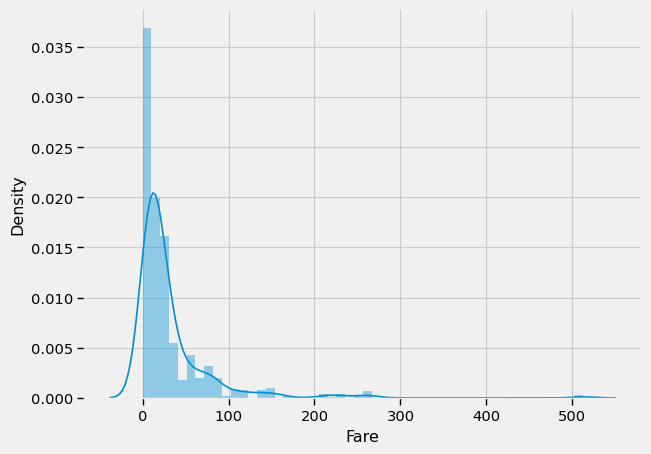

In [108]:
# Fare column
sns.distplot(train_df['Fare'])
print(train_df['Fare'].skew()) # skewness
print(train_df['Fare'].kurt()) # peakedness

<Axes: ylabel='Fare'>

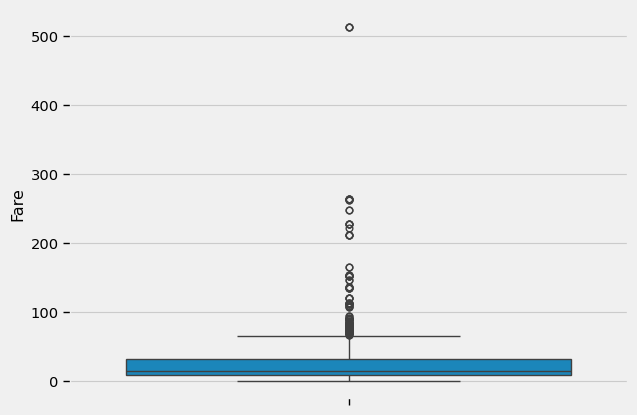

In [109]:
sns.boxplot(train_df['Fare'])

In [110]:
print("People with fare in between $100 and $300 are : ",train_df[(train_df['Fare']>100) & (train_df['Fare']<300)].shape[0])
print("People with fare greater than $300 are : ",train_df[train_df['Fare']>300].shape[0])

People with fare in between $100 and $300 are :  50
People with fare greater than $300 are :  3


<Axes: xlabel='Age', ylabel='Density'>

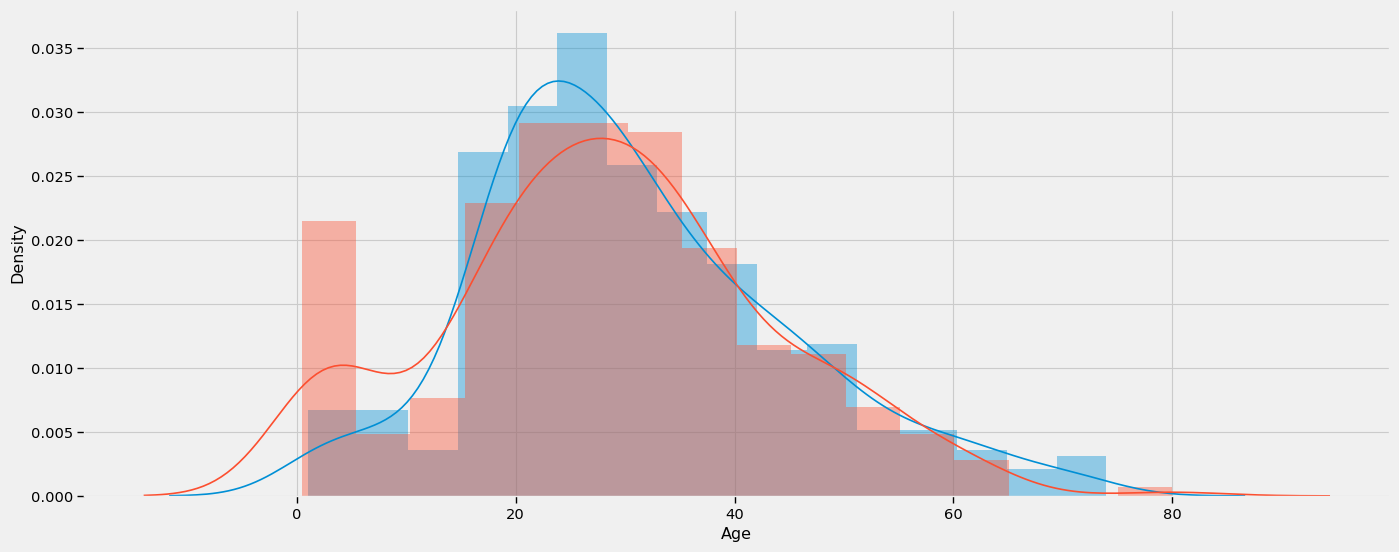

In [111]:
# Survival with Age
plt.figure(figsize=(15,6))
sns.distplot(train_df[train_df['Survived']==0]['Age'])
sns.distplot(train_df[train_df['Survived']==1]['Age'])

<Axes: xlabel='Fare', ylabel='Density'>

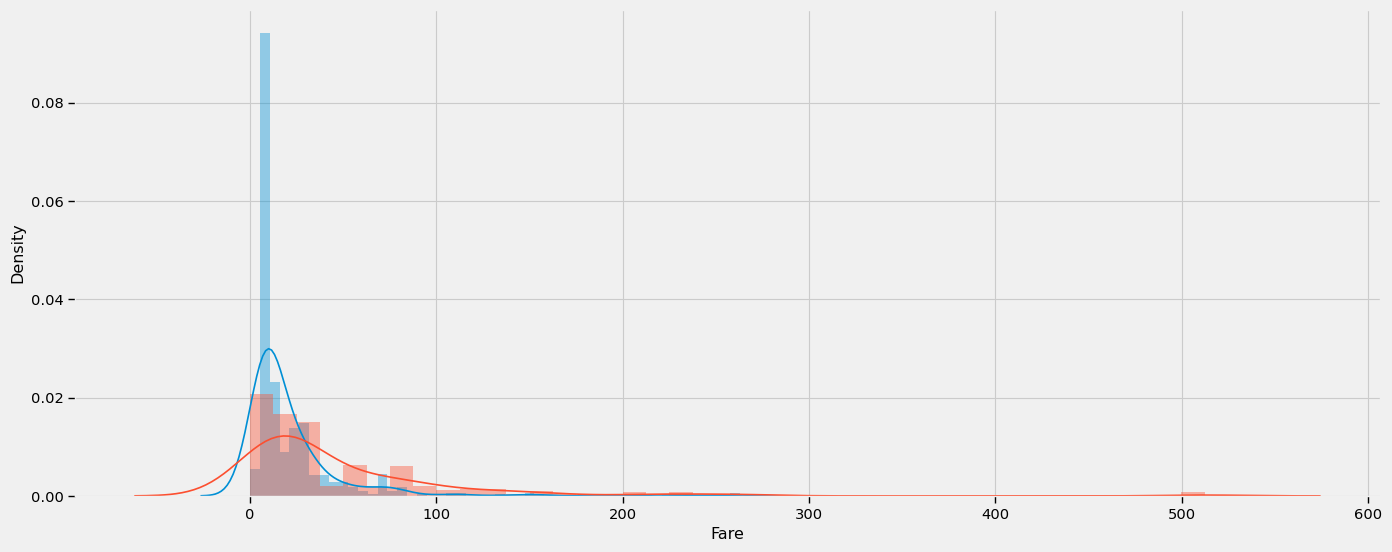

In [112]:
# Survival with Age
plt.figure(figsize=(15,6))
sns.distplot(train_df[train_df['Survived']==0]['Fare'])
sns.distplot(train_df[train_df['Survived']==1]['Fare'])

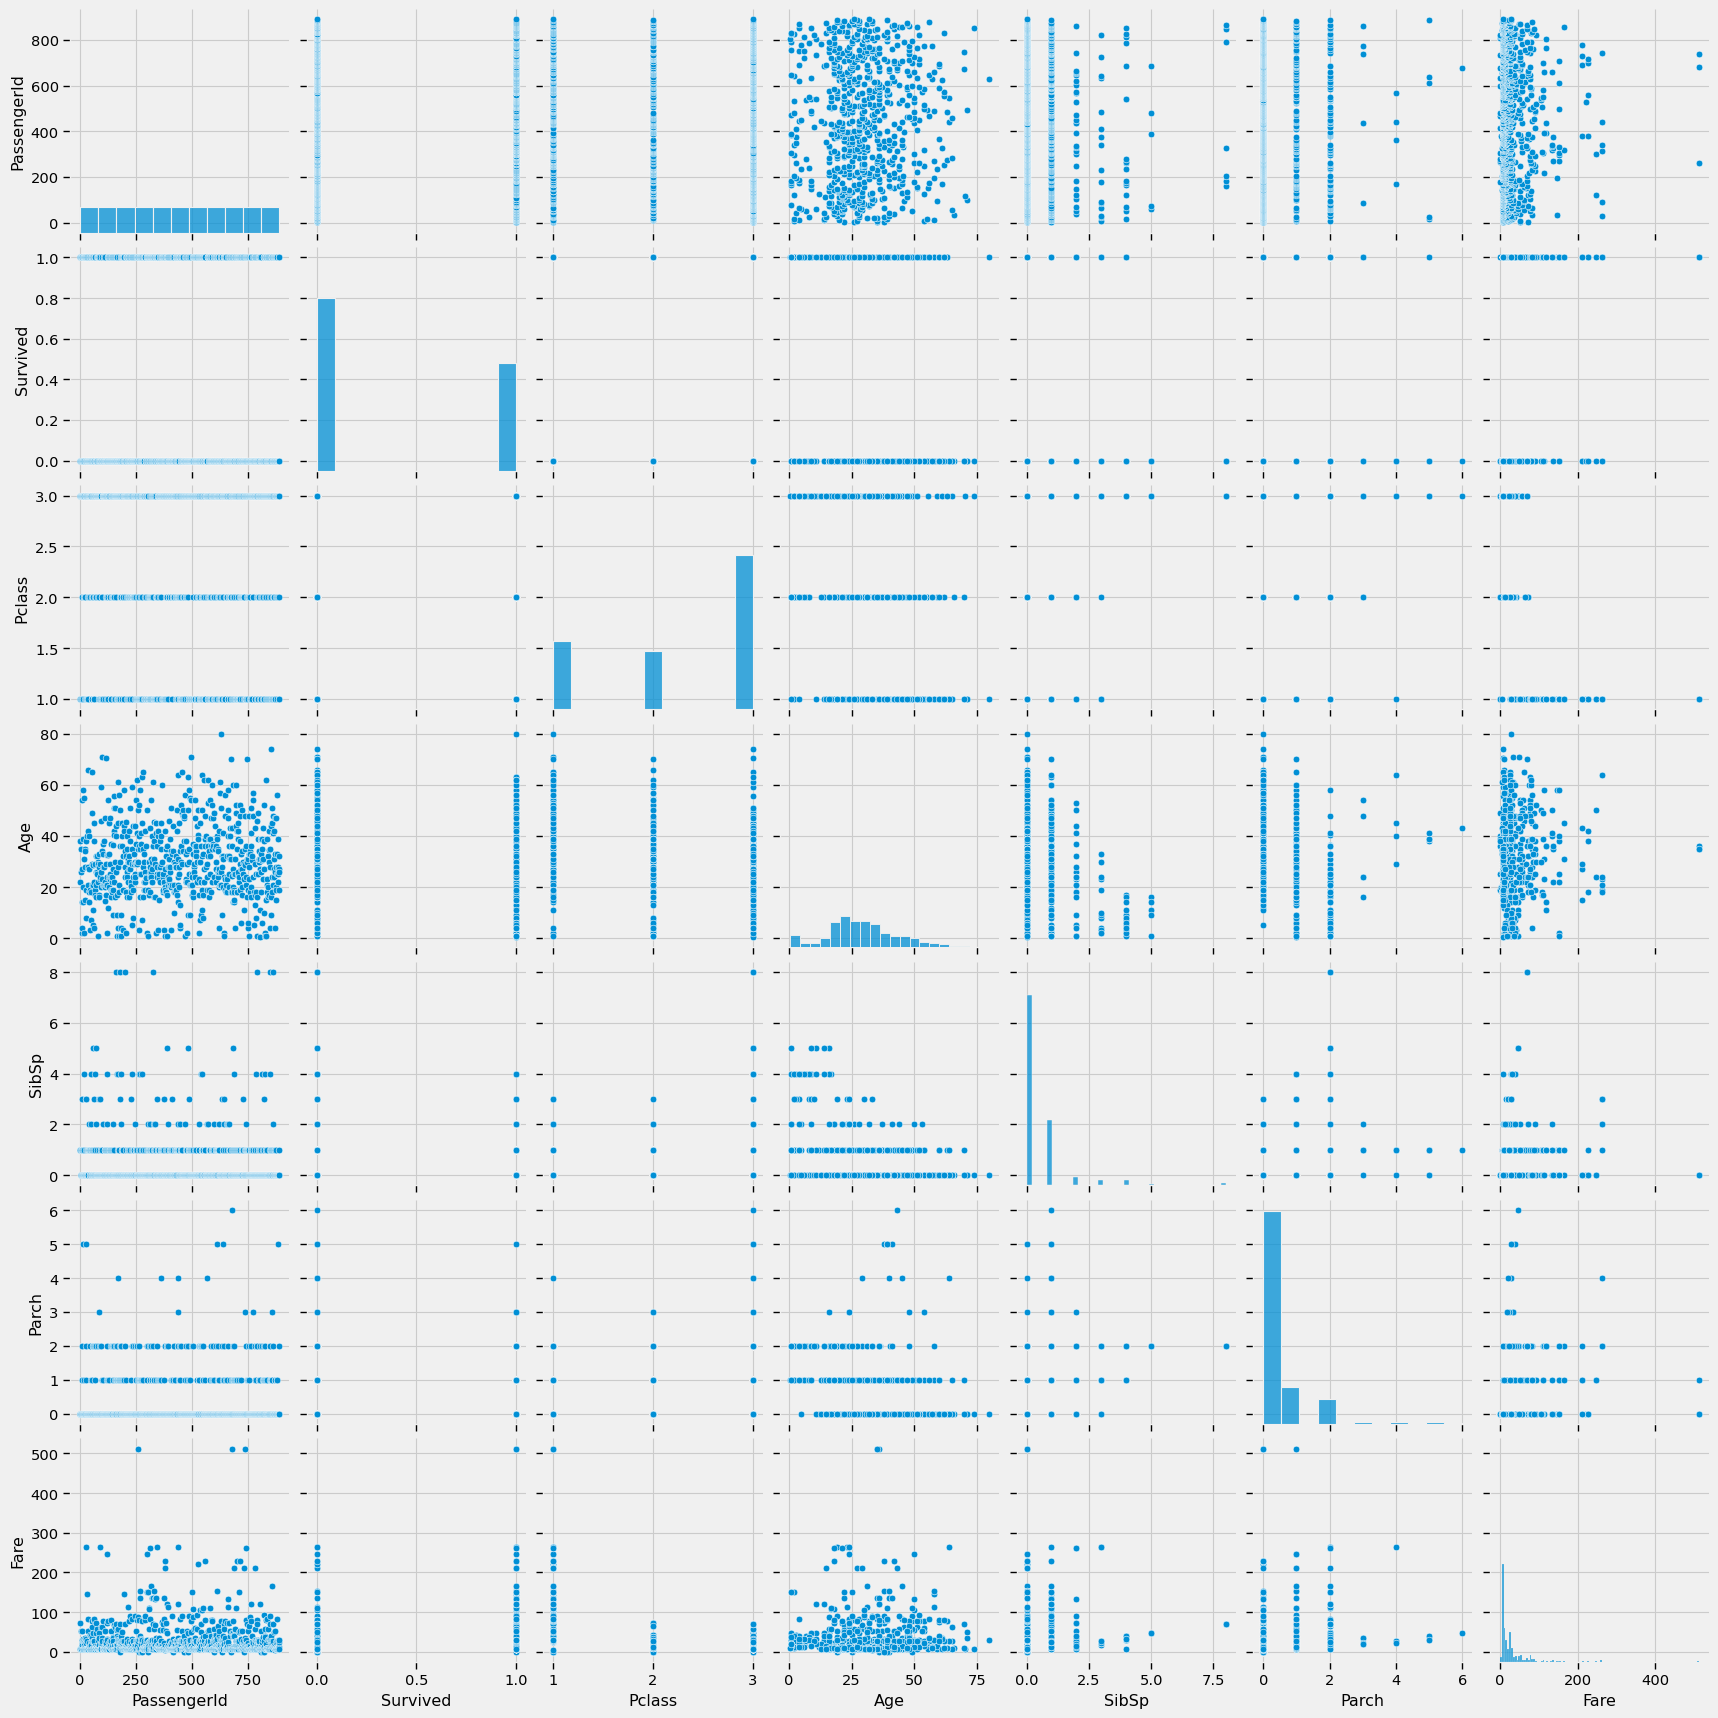

In [113]:
sns.pairplot(train_df)

<Axes: >

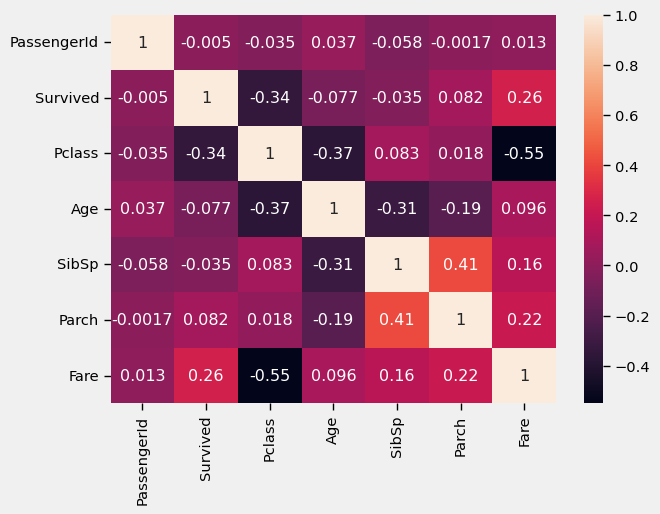

In [114]:
sns.heatmap(train_df[['PassengerId','Survived','Pclass','Age','SibSp',
                'Parch','Fare']].corr(),annot=True)

In [115]:
data = [train_df, test_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train_df['not_alone'].value_counts()

not_alone
1    537
0    354
Name: count, dtype: int64

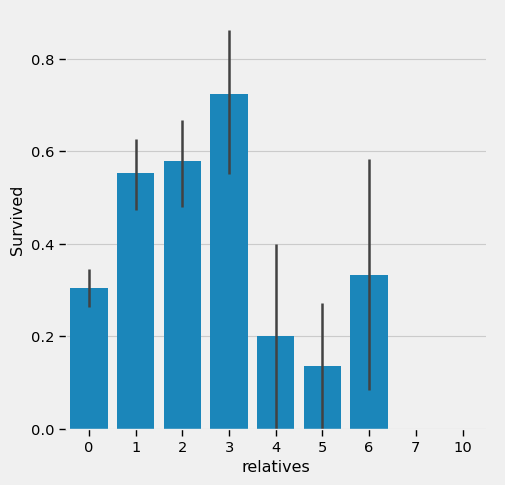

In [116]:
axes = sns.catplot(x='relatives', y='Survived', data=train_df, kind='bar')
plt.show()

In [117]:
train_df = train_df.drop(['PassengerId'],axis=1)

> We can see the values in the *Cabin* col, at first it seems like it doesn't give us any kind of insights, but after careful observation we can see that a cabin value looks like 'C85' and the letter refers to the deck. Therefore we're going to extract these and create new features, that contains a persons deck.

In [118]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train_df,test_df]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
    
    
# We can now drop the cabin feature
train_df = train_df.drop(['Cabin'],axis=1)
test_df = test_df.drop(['Cabin'],axis=1)

In [119]:
# Imputing Age column
data = [train_df,test_df]

for dataset in data:
    mean = train_df['Age'].mean()
    std = test_df['Age'].std()
    is_null = dataset['Age'].isnull().sum()
    #Compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size=is_null)
    
    # fill NaN values in Age column with random values generated
    age_slice = dataset['Age'].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset['Age'] = age_slice
    dataset['Age'] = train_df['Age'].astype(int)
    
train_df['Age'].isnull().sum()

0

In [120]:
train_df['Age']

0      22
1      38
2      26
3      35
4      35
       ..
886    27
887    19
888    16
889    26
890    32
Name: Age, Length: 891, dtype: int32

In [121]:
# Imputing Embarked column
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [122]:
most_freq = 'S'
data = [train_df,test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(most_freq)

In [123]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-null    object 
 4   Age        891 non-null    int32  
 5   SibSp      891 non-null    int64  
 6   Parch      891 non-null    int64  
 7   Ticket     891 non-null    object 
 8   Fare       891 non-null    float64
 9   Embarked   891 non-null    object 
 10  relatives  891 non-null    int64  
 11  not_alone  891 non-null    int32  
 12  Deck       891 non-null    int32  
dtypes: float64(1), int32(3), int64(5), object(4)
memory usage: 80.2+ KB


In [124]:
# Converting Fare from float to int64
data = [train_df,test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [125]:
# Feature extraction from Name column
data = [train_df, test_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    #extract titles
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.',expand=False)
    #replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle','Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
train_df = train_df.drop(['Name'],axis=1)
test_df = test_df.drop(['Name'],axis=1)

In [126]:
train_df['Title']

0      1
1      3
2      2
3      3
4      1
      ..
886    5
887    2
888    2
889    1
890    1
Name: Title, Length: 891, dtype: int64

In [127]:
# Convert 'Sex' feature into numeric
genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [128]:
train_df['Sex']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

In [129]:
train_df['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [130]:
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)

In [131]:
# Convert 'Embarked' to numeric
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [132]:
train_df['Embarked']

0      0
1      1
2      0
3      0
4      0
      ..
886    0
887    0
888    0
889    1
890    2
Name: Embarked, Length: 891, dtype: int64

In [133]:
data = [train_df, test_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

# let's see how it's distributed 
train_df['Age'].value_counts()

Age
4    167
6    159
5    149
3    136
2    116
1     96
0     68
Name: count, dtype: int64

In [135]:
data = [train_df, test_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [136]:
train_df['Fare'].value_counts()

Fare
0    241
2    223
1    216
3    158
4     44
5      9
Name: count, dtype: int64

In [137]:
# Creating new features
# 1. Age time class
data = [train_df, test_df]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']
train_df['Age_Class'].value_counts()

0       6
1       5
2       9
3       5
4      15
       ..
886     6
887     2
888     3
889     3
890    12
Name: Age_Class, Length: 891, dtype: int64

In [138]:
train_df['Age_Class'].value_counts()

Age_Class
6     194
12    128
3      88
9      82
15     69
0      68
18     48
5      46
4      44
8      42
10     34
2      30
1      18
Name: count, dtype: int64

In [139]:
# 2. Fare per person
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)
# Let's take a last look at the training set, before we start training the models.
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,0,3,0,2,1,0,0,0,1,0,8,1,6,0
1,1,1,1,5,1,0,3,1,1,0,3,3,5,1
2,1,3,1,3,0,0,0,0,0,1,8,2,9,0
3,1,1,1,5,1,0,3,0,1,0,3,3,5,1
4,0,3,0,5,0,0,1,0,0,1,8,1,15,1
5,0,3,0,3,0,0,1,2,0,1,8,1,9,1
6,0,1,0,6,0,0,3,0,0,1,5,1,6,3
7,0,3,0,0,3,1,2,0,4,0,8,4,0,0
8,1,3,1,3,0,2,1,0,2,0,8,3,9,0
9,1,2,1,1,1,0,2,1,1,0,8,3,2,1


# Model Building

In [140]:
X_train = train_df.drop("Survived",axis=1)
y_train = train_df['Survived']
X_test = test_df.drop('PassengerId',axis=1).copy()

In [141]:
# Stochastic Gradient Descent (SGD)

sgd = SGDClassifier(max_iter=5,tol=None)
sgd.fit(X_train,y_train)
y_pred = sgd.predict(X_test)

sgd.score(X_train,y_train)
acc_sgd = round(sgd.score(X_train,y_train) * 100,2)
acc_sgd

69.7

In [143]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

92.82

In [144]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

81.59

In [145]:
# K Nearest Neighbor

knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, y_train)  
y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

86.31

In [147]:
# Gaussian Naive Bayes

gaussian = GaussianNB() 
gaussian.fit(X_train, y_train)  
y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

78.56

In [148]:
# Perceptron

perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, y_train)

y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)
acc_perceptron

75.31

In [149]:
# Linear Support Vector Machine

linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)

y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
acc_linear_svc

81.59

In [150]:
# Decision Tree

decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train)  
y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

92.82

In [151]:
# Comparing the models (Which is Best)

results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
92.82,Random Forest
92.82,Decision Tree
86.31,KNN
81.59,Support Vector Machines
81.59,Logistic Regression
78.56,Naive Bayes
75.31,Perceptron
69.70,Stochastic Gradient Decent


In [152]:
# Cross Validation

from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.76666667 0.83146067 0.7752809  0.84269663 0.88764045 0.83146067
 0.78651685 0.78651685 0.86516854 0.84269663]
Mean: 0.8216104868913858
Standard Deviation: 0.03868971867982236


In [153]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Title,0.195
Sex,0.181
Age_Class,0.101
Age,0.080
Pclass,0.078
Deck,0.076
Fare,0.064
relatives,0.062
Embarked,0.049


<Axes: xlabel='feature'>

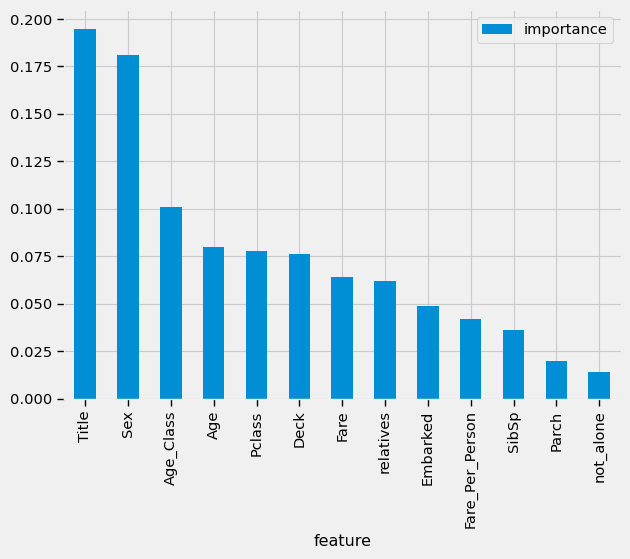

In [154]:
importances.plot.bar()

In [155]:
# Dropping columns which are not significant as per the above results

train_df  = train_df.drop("not_alone", axis=1)
test_df  = test_df.drop("not_alone", axis=1)

train_df  = train_df.drop("Parch", axis=1)
test_df  = test_df.drop("Parch", axis=1)

In [156]:
# training Random Forest again

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, y_train)
y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)

acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

92.82 %
